# Pseudorandom Number Generation

The building block of computational simulation is the generation of uniform random
numbers. If we can draw from $U(O, 1)$, then we can draw from most other distributions.
Thus the construction of sampling from $U(O, 1)$ requires special attention.
Computers can generate numbers between $(0, 1)$, which although are not exactly random (and in fact deterministic), but have the appearance of being $U(0,1)$ random variables. These draws from $U(0,1)$ are $pseudorandom$ draws.
The goal in $pseudorandom$ generation is to draw $$X_1, X_2, \dots , X_n \quad \underset{\sim}{\mathrm{\tiny{approx iid}}} \quad U(0, 1)$$
The resultant sample is as uniformly distributed as posible, and as independent as
possible. We will learn about two different pseudorandom generators. These are very
basic ones that are actually not really used in real life, but make our point well.
## Multiplicative congruential method
A common algorithm to generate a sequence $\{x_n\}$ is the *multiplicative congruential method*:
- Set *seed* $y_0$, and positive integers $a, m$.
- Obatain $y_t = ay_{t-1} \ \mathrm{mod} \ m$ for $t = 1, \dots , n$
- Return sequence $x_t = y_t/m$ for $ t = 1, \dots , n$\

Since $y_t \in \{0 , 1, \dots , m-1\}$, $x_t/m \in (0,1)$, and in this way $x_t$ are draws that are between $(0,1)$. Also note that after some finite number of steps $< m$, the algorithm will repeat itself, since when a seed $y_0$ is set, a deterministic sequence of numbers follows. Naturally, to allow for the sequence $x_t$ to mimic uniform and random draws $m$ should be large, and is often chosed to be a large prime number.\
**Example 1.** Set $a = 123$ and $m = 10$, and let $y_0 = 7$. Then\
$\begin{align}
& y_1 = 123 * 7 \ \mathrm{mod} \ 10 = 1\\
& y_2 = 123 * 1 \ \mathrm{mod} \ 10 = 3\\
& y_3 = 123 * 1 \ \mathrm{mod} \ 10 = 9\\
& y_4 = 123 * 1 \ \mathrm{mod} \ 10 = 7; y_0 = 7\\
& y_5 = 123 * 1 \ \mathrm{mod} \ 10 = 1\\
& \vdots
\end{align}$


Thus, we see that the above choices of $a, m, y_0$ repeats itself. It is also recommended that $a$ is large to ensure large jumps, and reduce "dependence" in the sequence. Based on the bits of your machine, it is recommended to set $m = 2^{31}-1$ and $a = 7^5$. Notice both are large. 

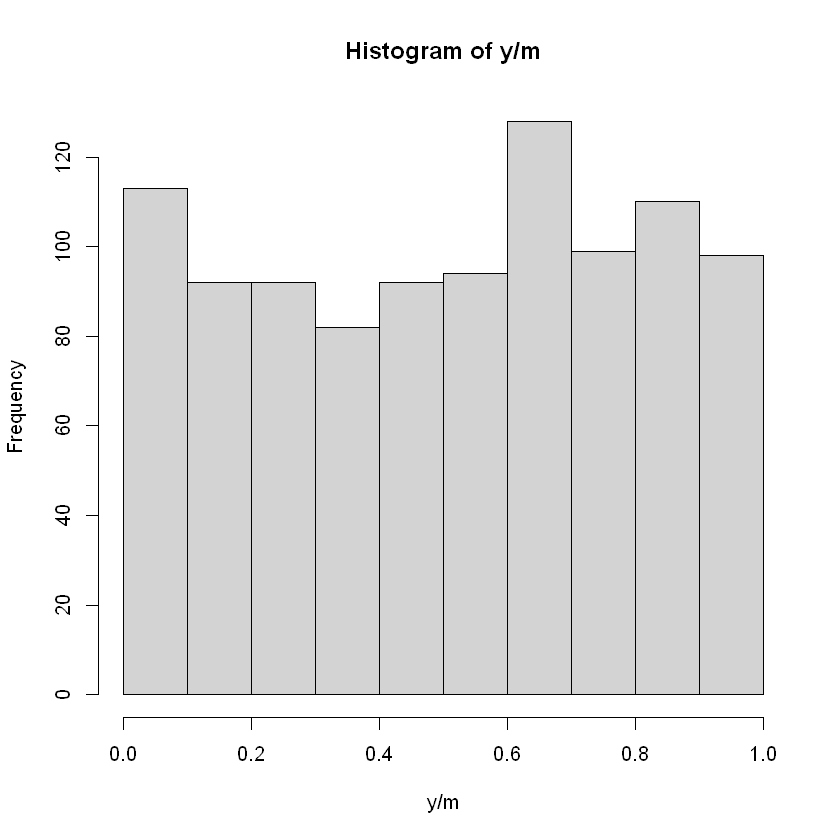

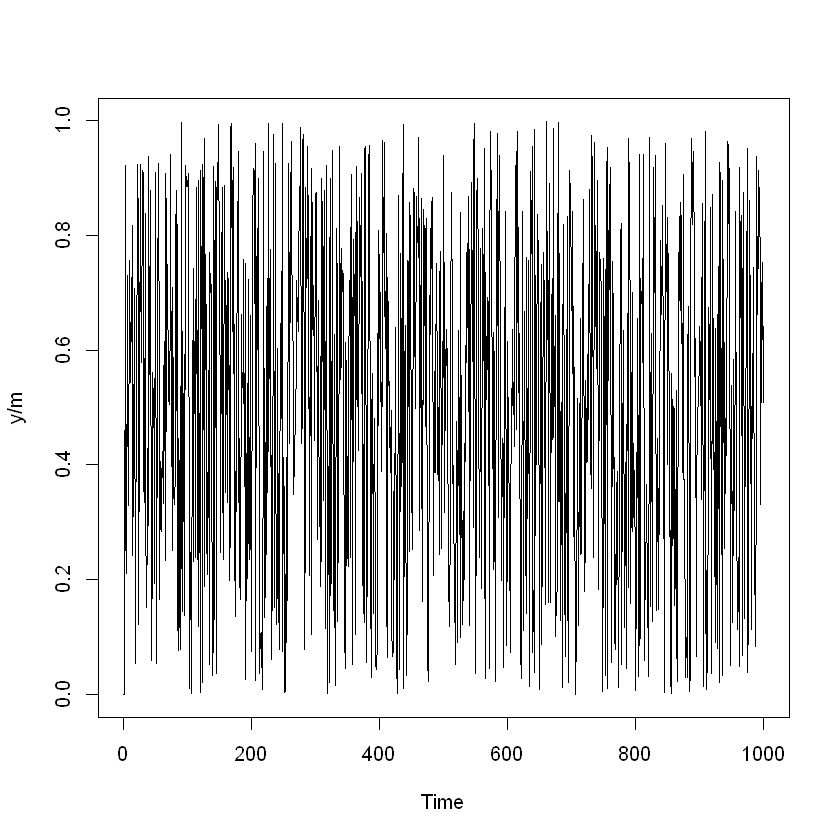

In [5]:
# Let's generate this using R code
m <- 2^31 - 1
a <- 7^5
y <- numeric(length = 1e3)
y[1] <- 7

for (i in 2:1e3){
    y[i] <- (a*y[i-1])%%m
}

par(mfrow = c(1,1))
hist(y/m) # looks close to uniformly distributed
plot.ts(y/m) # look like it's jumping around (trace plot)

Any pseudorandom generation method should satisfy:
1. for any seed, the sequence has the "appearance" of being IID from $U(0,1)$.
2. for any initial seed, repetition of values should happen very late.
3. the values can be computed efficiently.

## Mixed Congruential Generator
Notice that in the previous method, if we set the seed to be zero, the algorithm fails! To combat this, there is another method, the **mixed congruential generator:**

1. Set seed $y_0$, and positive integers $a, c, m$.
2. $y_t = (ay_{t-1} + c) \ \mathrm{mod} \ m$.
3. Return sequence $x_t = y_t/m$ for $t = 1, \dots , n$.

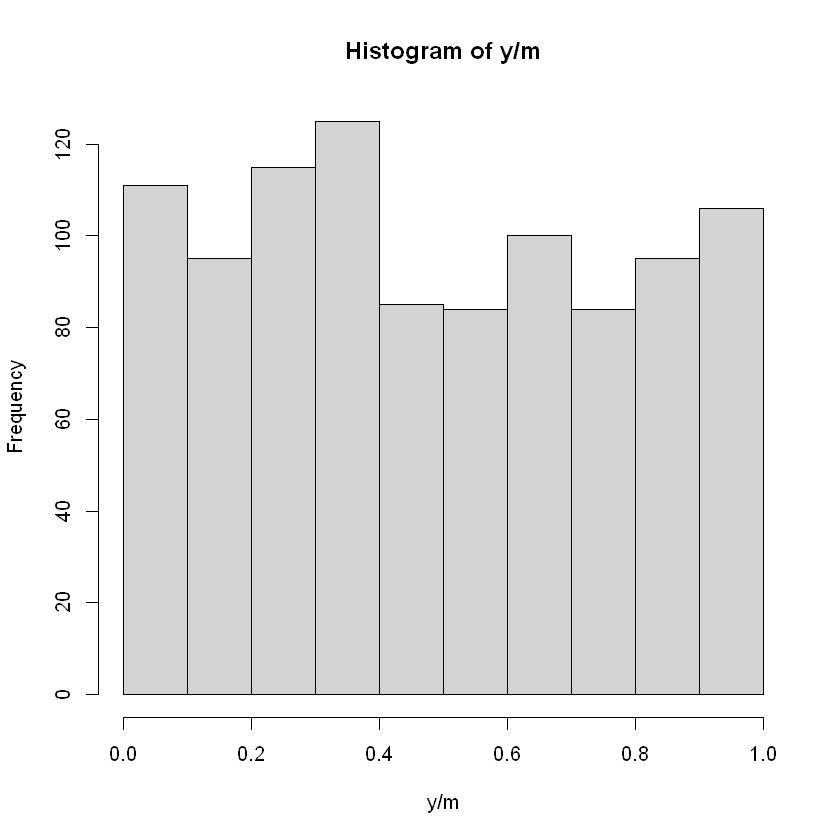

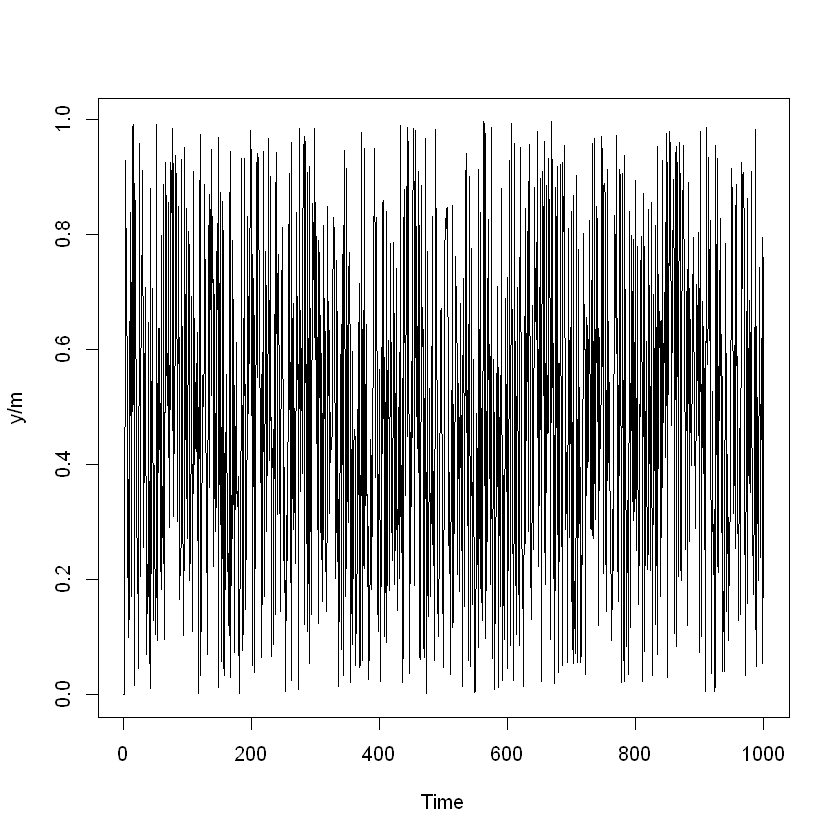

In [7]:
m <- 2^31 - 1
a <- 7^5
c = 2^10 - 1
y <- numeric(length = 1e3)
y[1] <- 7

for (i in 2:1e3){
    y[i] <- (c + a*y[i - 1]) %% m
}

par(mfrow = c(1,1))
hist(y/m)
plot.ts(y/m)

We must be cautious not to be happy with just a histogram. A histogram shows that the empirical distribution of all samples is uniformly distributed. But we can still get a uniform looking histogram if we set $a = 1, m = 1e3$ and $c = 1$.

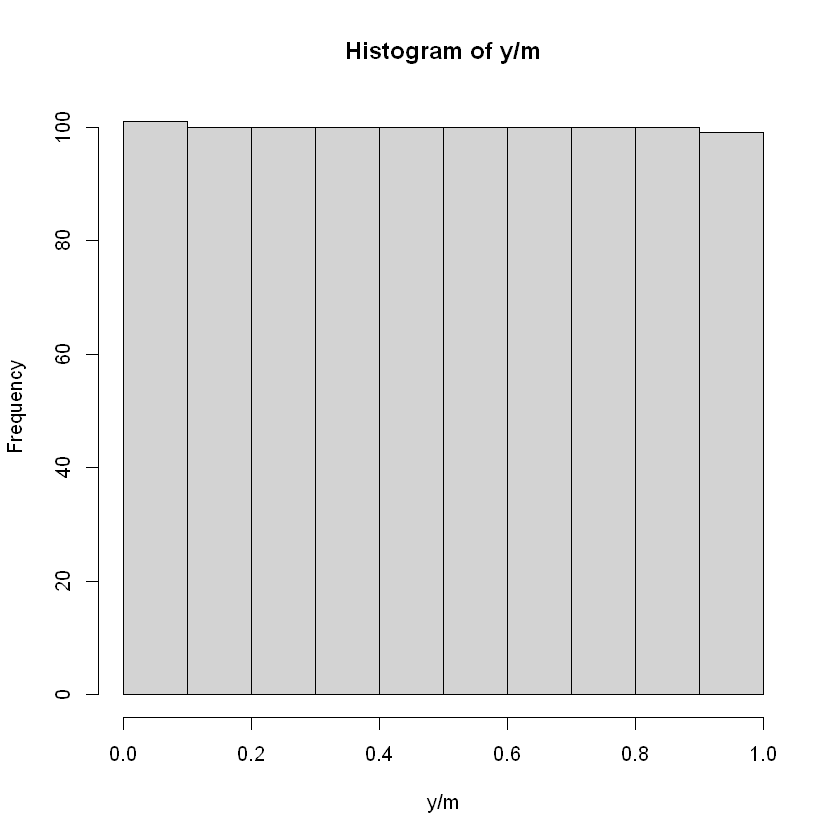

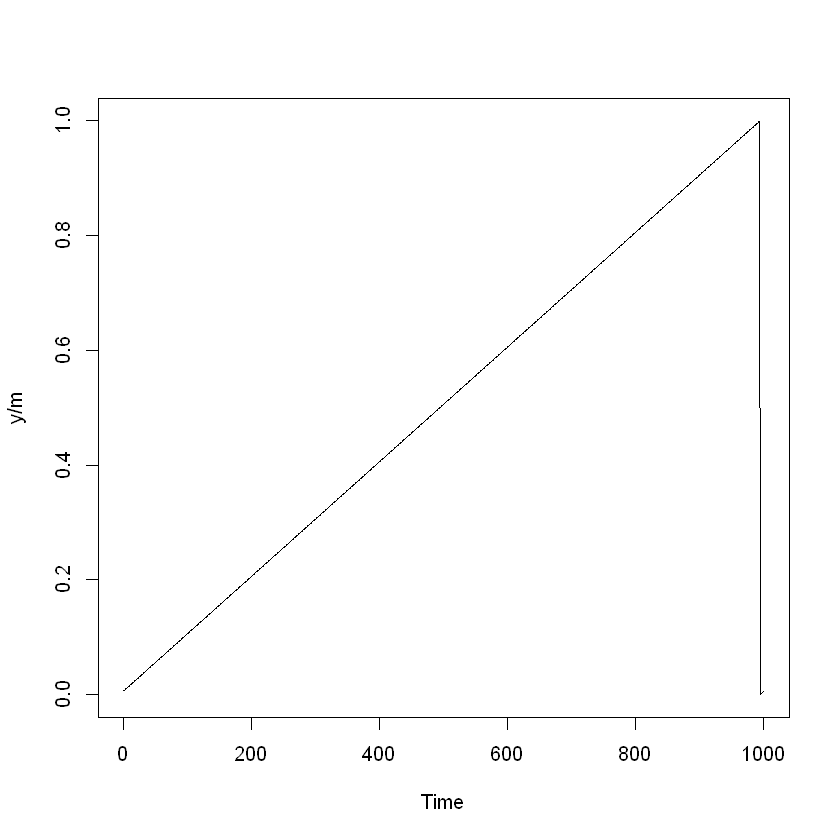

In [8]:
m <- 1e3
a <- 1
c = 1
y <- numeric(length = 1e3)
y[1] <- 7

for (i in 2:1e3){
    y[i] <- (c + a*y[i - 1]) %% m
}

par(mfrow = c(1,1))
hist(y/m)
plot.ts(y/m)

**runif()** in R uses the Mersenne-Twister generator by default, but there are options to use other generators. 

## Generating $U(a,b)$

Suppose we can draw from $U(a,b)$ for any $a, b \in \mathbb{R}$. But we only know how to draw from $U(0,1)$. Note that if $U \sim U(0,1)$, then for any $a, b$, $$(b-a)U + a \sim U(a,b)$$
That means, we can draw $U \sim U(0,1)$ and set $X = (b-a)U + a.$ Then $X \sim U(a, b)$.

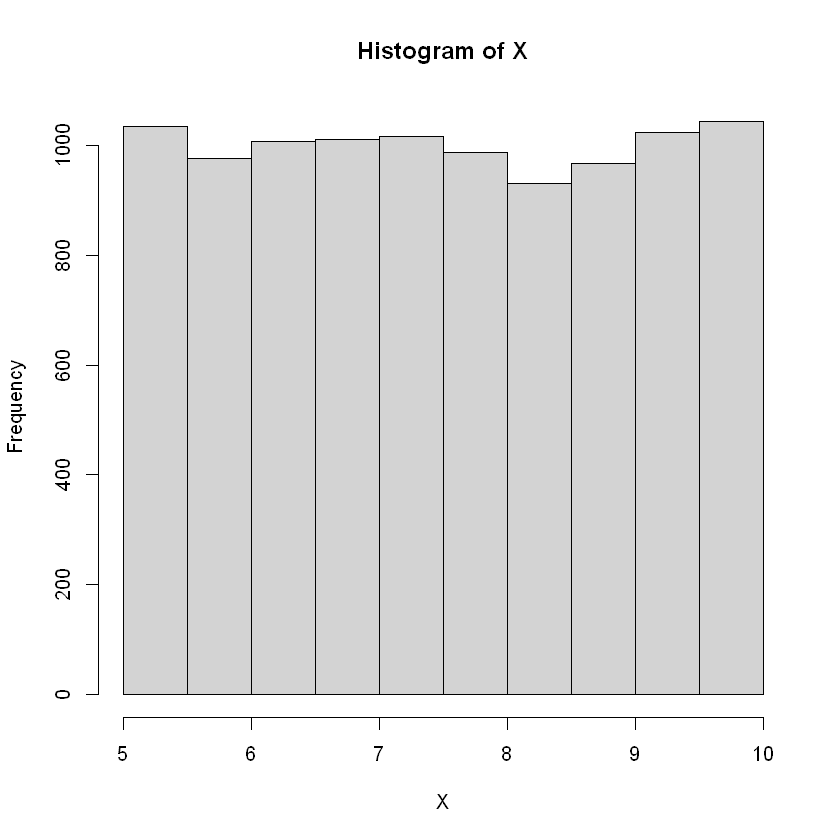

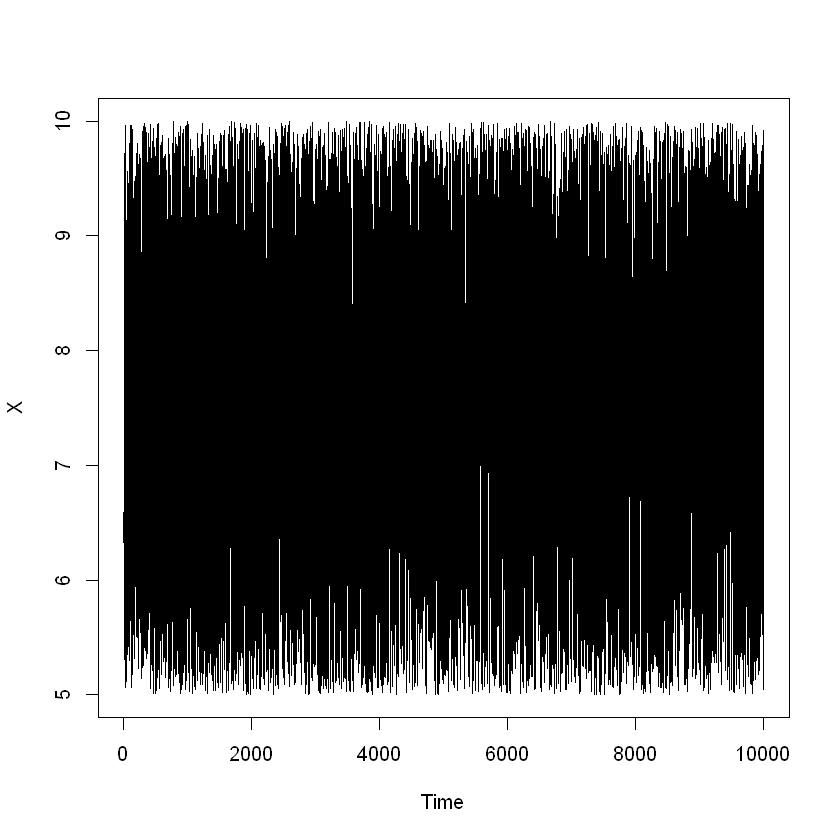

In [14]:
set.seed(1)
repeats <- 1e4
b <- 10
a <- 5
U <- runif(repeats, min = 0, max = 1)
X <- (b-a)*U + a

hist(X)
plot.ts(X)